In [28]:
import pandas as pd
from datetime import datetime

In [12]:
df1=pd.read_csv('/Users/santruptshekhar/Desktop/analytics_project/csv_files/raw.csv')
df2=pd.read_csv('/Users/santruptshekhar/Desktop/analytics_project/csv_files/transaction.csv')

In [14]:
df = pd.merge(df1, df2, left_on='customer_id', right_on='customer_id', how='inner')

In [15]:
df

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,...,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date,Profit
0,1,Laraine,Medendorp,Female,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,...,0,Approved,OHM Cycles,Standard,medium,medium,235.63,125.07,00:00.0,110.56
1,1,Laraine,Medendorp,Female,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,...,1,Approved,Solex,Standard,medium,medium,1577.53,826.51,00:00.0,751.02
2,1,Laraine,Medendorp,Female,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,...,1,Approved,Trek Bicycles,Road,low,small,1720.70,1531.42,00:00.0,189.28
3,1,Laraine,Medendorp,Female,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,...,0,Approved,Norco Bicycles,Standard,medium,medium,360.40,270.30,00:00.0,90.10
4,1,Laraine,Medendorp,Female,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,...,0,Approved,Solex,Standard,medium,medium,71.49,53.62,00:00.0,17.87
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13635,3496,Danya,Burnyeat,Male,99,1986-04-25,Editor,Manufacturing,Mass Customer,N,...,0,Approved,Trek Bicycles,Mountain,low,medium,574.64,459.71,00:00.0,114.93
13636,3496,Danya,Burnyeat,Male,99,1986-04-25,Editor,Manufacturing,Mass Customer,N,...,1,Approved,Norco Bicycles,Standard,high,small,1661.92,1479.11,00:00.0,182.81
13637,3497,Thia,O'Day,Female,73,1986-05-03,Administrative Assistant IV,Manufacturing,Affluent Customer,N,...,1,Approved,Giant Bicycles,Standard,medium,medium,1403.50,954.82,00:00.0,448.68
13638,3497,Thia,O'Day,Female,73,1986-05-03,Administrative Assistant IV,Manufacturing,Affluent Customer,N,...,1,Approved,Solex,Standard,medium,medium,575.27,431.45,00:00.0,143.82


In [16]:
df['transaction_date']= pd.to_datetime(df['transaction_date']) #since transactionn date type has to be in date time format

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13640 entries, 0 to 13639
Data columns (total 27 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   customer_id                          13640 non-null  int64         
 1   first_name                           13640 non-null  object        
 2   last_name                            13640 non-null  object        
 3   gender                               13640 non-null  object        
 4   past_3_years_bike_related_purchases  13640 non-null  int64         
 5   DOB                                  13640 non-null  object        
 6   job_title                            13640 non-null  object        
 7   job_industry_category                13640 non-null  object        
 8   wealth_segment                       13640 non-null  object        
 9   deceased_indicator                   13640 non-null  object        
 10  owns_car  

In [23]:
max_date=df['transaction_date'].max().date()

In [29]:
# Taking the last transaction date as a reference date for comparision and finding the number of days between a transaction date and last transaction date to calculate the recency.

comparison_date = datetime.strptime(str(max_date), "%Y-%m-%d")
comparison_date

datetime.datetime(2017, 12, 30, 0, 0)

In [30]:
rfm_table = df.groupby(['customer_id']).agg({'transaction_date': lambda date : (comparison_date - date.max()).days,
                                                            'product_id' : lambda product_id : len(product_id), 
                                                            'Profit' : lambda Profit : sum(Profit)})

In [35]:
rfm_table.columns=['recency','frequency','monetary']

In [36]:
rfm_table

,recency,frequency,monetary
customer_id,,,
1,7,11,3018.09
2,54,3,2226.26
3,102,7,3290.21
9,78,6,2353.11
10,43,5,3358.28
...,...,...,...
3493,93,6,3728.88
3494,4,4,2755.11
3495,13,7,3847.65


In [42]:
#dividing rfm into 4 quaterlies min, 25,50,75,max. This will help uss calculate rfm score to find out thevaluable customers
rfm_table['r_quartile'] = pd.qcut(rfm_table['recency'], 4, ['4','3','2','1']) #here the order is different because in recency we assign hihest priority to the customer most recent in the recent quater. Thus giving it a higher value.  
rfm_table['f_quartile'] = pd.qcut(rfm_table['frequency'], 4, ['1','2','3','4'])
rfm_table['m_quartile'] = pd.qcut(rfm_table['monetary'], 4, ['1','2','3','4'])


In [43]:
rfm_table

,recency,frequency,monetary,r_quartile,f_quartile,m_quartile,rfm_score
customer_id,,,,,,,
1,7,11,3018.09,4,4,3,143
2,54,3,2226.26,2,1,2,312
3,102,7,3290.21,1,3,3,433
9,78,6,2353.11,2,3,2,332
10,43,5,3358.28,3,2,3,223
...,...,...,...,...,...,...,...
3493,93,6,3728.88,1,3,3,433
3494,4,4,2755.11,4,1,2,112
3495,13,7,3847.65,4,3,3,133


In [44]:
#assigning rfm score, giving resency the highest priority, the frequency then monetary
rfm_table['rfm_score'] = 100*rfm_table['r_quartile'].astype(int)+10*rfm_table['f_quartile'].astype(int)+rfm_table['m_quartile'].astype(int)
rfm_table

,recency,frequency,monetary,r_quartile,f_quartile,m_quartile,rfm_score
customer_id,,,,,,,
1,7,11,3018.09,4,4,3,443
2,54,3,2226.26,2,1,2,212
3,102,7,3290.21,1,3,3,133
9,78,6,2353.11,2,3,2,232
10,43,5,3358.28,3,2,3,323
...,...,...,...,...,...,...,...
3493,93,6,3728.88,1,3,3,133
3494,4,4,2755.11,4,1,2,412
3495,13,7,3847.65,4,3,3,433


In [45]:
rfm_df = pd.merge(df, rfm_table, left_on='customer_id', right_on='customer_id', how='inner')

In [46]:
rfm_df

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,...,standard_cost,product_first_sold_date,Profit,recency,frequency,monetary,r_quartile,f_quartile,m_quartile,rfm_score
0,1,Laraine,Medendorp,Female,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,...,125.07,00:00.0,110.56,7,11,3018.09,4,4,3,443
1,1,Laraine,Medendorp,Female,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,...,826.51,00:00.0,751.02,7,11,3018.09,4,4,3,443
2,1,Laraine,Medendorp,Female,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,...,1531.42,00:00.0,189.28,7,11,3018.09,4,4,3,443
3,1,Laraine,Medendorp,Female,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,...,270.30,00:00.0,90.10,7,11,3018.09,4,4,3,443
4,1,Laraine,Medendorp,Female,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,...,53.62,00:00.0,17.87,7,11,3018.09,4,4,3,443
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13635,3496,Danya,Burnyeat,Male,99,1986-04-25,Editor,Manufacturing,Mass Customer,N,...,459.71,00:00.0,114.93,180,4,2045.84,1,1,2,112
13636,3496,Danya,Burnyeat,Male,99,1986-04-25,Editor,Manufacturing,Mass Customer,N,...,1479.11,00:00.0,182.81,180,4,2045.84,1,1,2,112
13637,3497,Thia,O'Day,Female,73,1986-05-03,Administrative Assistant IV,Manufacturing,Affluent Customer,N,...,954.82,00:00.0,448.68,21,3,1648.32,3,1,1,311
13638,3497,Thia,O'Day,Female,73,1986-05-03,Administrative Assistant IV,Manufacturing,Affluent Customer,N,...,431.45,00:00.0,143.82,21,3,1648.32,3,1,1,311


In [51]:
max(rfm_table['rfm_score'])

444

In [49]:
import math
rfm_df['Age_Group'] = rfm_df['Age'].apply(lambda x : (math.floor(x/10)+1)*10) #creating a new categpry age group.

In [60]:
#dividing customer into 11 groups based on rfm score
def rfm_title(cols):
    
    rfm_score = cols[0]
    
    if rfm_score >= 444:
        return 'Platinum Customer'
    elif rfm_score >=433 and rfm_score < 444:
        return 'Very Loyal'
    elif rfm_score >=421 and rfm_score < 433:
        return 'Becoming Loyal'
    elif rfm_score >=344 and rfm_score < 423:
        return 'Recent Customer'
    elif rfm_score >=323 and rfm_score < 343:
        return 'Potential Customer'
    elif rfm_score >=311 and rfm_score < 323:
        return 'Late Bloomer'
    elif rfm_score >=224 and rfm_score < 313:
        return 'Loosing Customer'
    elif rfm_score >=212 and rfm_score < 223:
        return 'High Risk Customer'
    elif rfm_score >=124 and rfm_score < 213:
        return 'Almost Lost Customer'
    elif rfm_score >=112 and rfm_score < 123:
        return 'Evasive Customer'
    else :
        return 'Lost Customer'

In [61]:
# Applying the above functions and creating a column, customer_title

rfm_df['customer_title']=rfm_df[['rfm_score']].apply(rfm_title, axis=1)

In [62]:
rfm_df

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,...,recency,frequency,monetary,r_quartile,f_quartile,m_quartile,rfm_score,Age_Group,detail_cust_title,customer_title
0,1,Laraine,Medendorp,Female,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,...,7,11,3018.09,4,4,3,443,80,Very Loyal,Very Loyal
1,1,Laraine,Medendorp,Female,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,...,7,11,3018.09,4,4,3,443,80,Very Loyal,Very Loyal
2,1,Laraine,Medendorp,Female,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,...,7,11,3018.09,4,4,3,443,80,Very Loyal,Very Loyal
3,1,Laraine,Medendorp,Female,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,...,7,11,3018.09,4,4,3,443,80,Very Loyal,Very Loyal
4,1,Laraine,Medendorp,Female,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,...,7,11,3018.09,4,4,3,443,80,Very Loyal,Very Loyal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13635,3496,Danya,Burnyeat,Male,99,1986-04-25,Editor,Manufacturing,Mass Customer,N,...,180,4,2045.84,1,1,2,112,40,Evasive Customer,Evasive Customer
13636,3496,Danya,Burnyeat,Male,99,1986-04-25,Editor,Manufacturing,Mass Customer,N,...,180,4,2045.84,1,1,2,112,40,Evasive Customer,Evasive Customer
13637,3497,Thia,O'Day,Female,73,1986-05-03,Administrative Assistant IV,Manufacturing,Affluent Customer,N,...,21,3,1648.32,3,1,1,311,40,Late Bloomer,Late Bloomer
13638,3497,Thia,O'Day,Female,73,1986-05-03,Administrative Assistant IV,Manufacturing,Affluent Customer,N,...,21,3,1648.32,3,1,1,311,40,Late Bloomer,Late Bloomer


In [80]:
#calculating the number of customers in each title
no_customers_title = rfm_df[['customer_title', 'customer_id']].drop_duplicates().groupby(['customer_title']).size().reset_index()

In [85]:
no_customers_title.rename(columns={0:'Number of Customers'}, inplace=True)
no_customers_title

,customer_title,Number of Customers
0,Almost Lost Customer,272
1,Becoming Loyal,187
2,Evasive Customer,193
3,High Risk Customer,137
4,Late Bloomer,212
5,Loosing Customer,321
6,Lost Customer,317
7,Platinum Customer,120
8,Potential Customer,258
9,Recent Customer,249


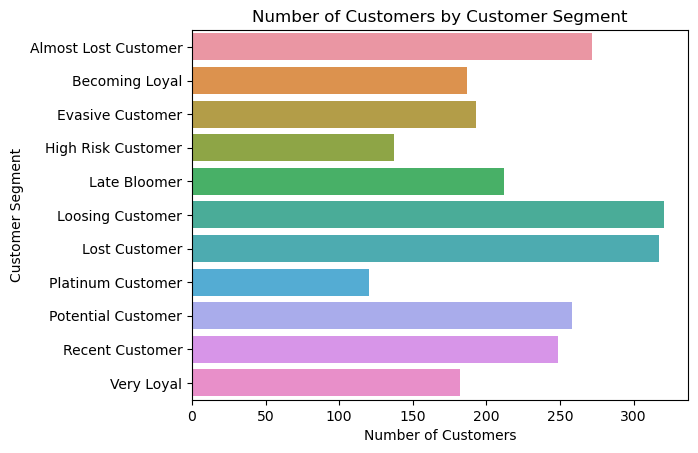

In [94]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.barplot(y='customer_title' , x='Number of Customers', data=no_customers_title)
plt.xlabel('Number of Customers')
plt.ylabel('Customer Segment')
plt.title('Number of Customers by Customer Segment')
plt.show()

<Figure size 800x700 with 0 Axes>

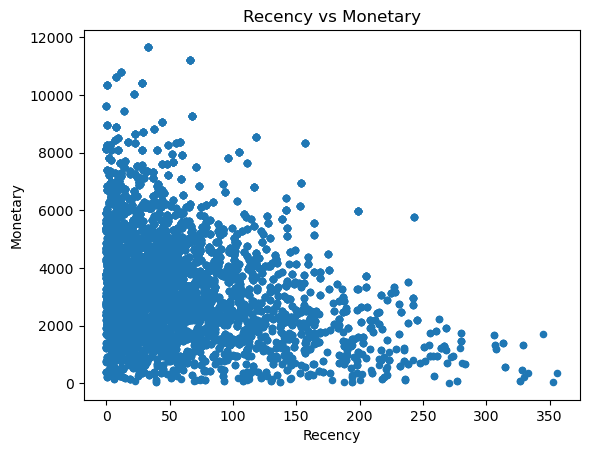

In [96]:
#recency vs monetary 
plt.figure(figsize=(8,7))
rfm_df.plot.scatter(x='recency' , y='monetary')
plt.xlabel('Recency')
plt.ylabel('Monetary')
plt.title('Recency vs Monetary')
plt.show()

<Figure size 800x700 with 0 Axes>

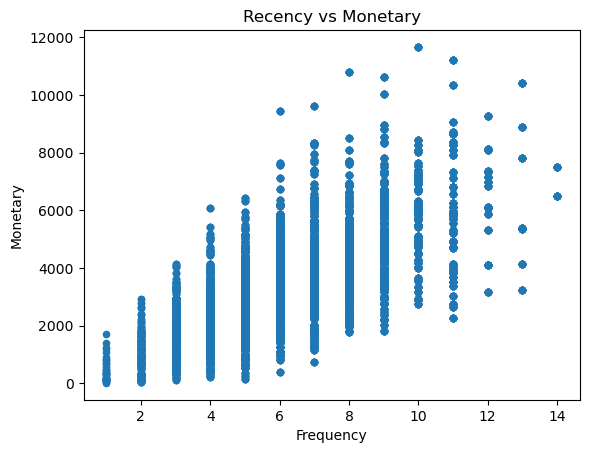

In [98]:
#frequency vs monetary
plt.figure(figsize=(8,7))
rfm_df.plot.scatter(x='frequency' , y='monetary')
plt.xlabel('Frequency')
plt.ylabel('Monetary')
plt.title('Recency vs Monetary')
plt.show()

In [100]:
rfm_df.to_csv('/Users/santruptshekhar/Desktop/analytics_project/csv_files/rfm_analysis.csv', index=False)